In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

In [23]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [24]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


Checking for null values


In [25]:
 df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


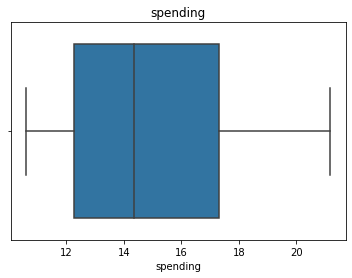

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


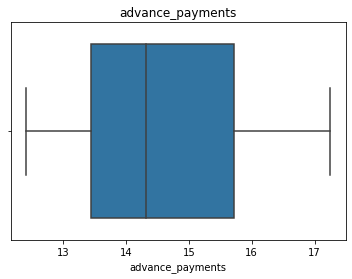

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


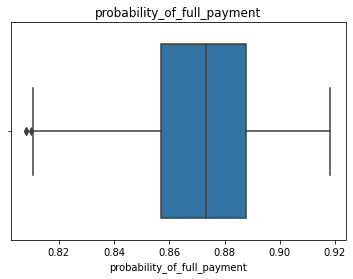

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


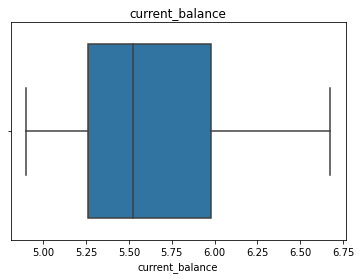

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


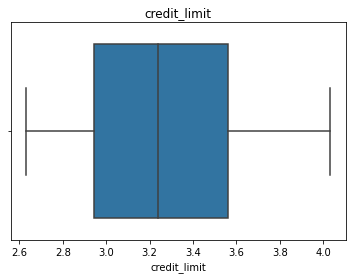

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


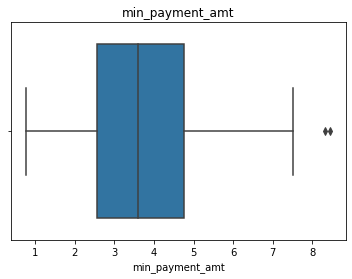

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


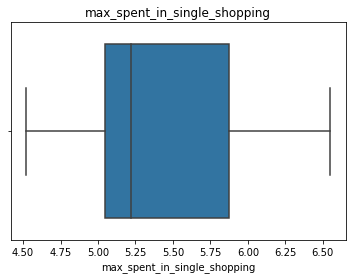

In [28]:
for i in df.columns:
  plt.title(f'{i}')
  sns.boxplot(df[f'{i}'])
  plt.show()

Observations: minimum payment and probablity of full payment option are having outliers.

Using statistical outlier detection method for dealing outliers.

In [29]:
print("Highest allowed for minimum payemnt",df['min_payment_amt'].mean() + 3*df['min_payment_amt'].std())
print("Lowest allowed minimum payemnt",df['min_payment_amt'].mean() - 3*df['min_payment_amt'].std())

Highest allowed for minimum payemnt 8.21087234484629
Lowest allowed minimum payemnt -0.8104704400843872


In [30]:
print("Highest allowed for prob. of full payemnt",df['probability_of_full_payment'].mean() + 3*df['probability_of_full_payment'].std())
print("Lowest allowed prob of full payemnt",df['probability_of_full_payment'].mean() - 3*df['probability_of_full_payment'].std())

Highest allowed for prob. of full payemnt 0.9418868211801109
Lowest allowed prob of full payemnt 0.8001103216770319


In [31]:
print('Number of outliers in min_payment_amount upper : ', df[df['min_payment_amt']>8.21087234484629]['min_payment_amt'].count())
print('Number of outliers in min_payment_amont lower : ', df[df['min_payment_amt']<-0.8104704400843872]['min_payment_amt'].count())

Number of outliers in min_payment_amount upper :  2
Number of outliers in min_payment_amont lower :  0


In [32]:
print('Number of outliers in prob. of full payemnt upper : ', df[df['probability_of_full_payment']>0.9418868211801109]['probability_of_full_payment'].count())
print('Number of outliers in prob. of full payemnt lower : ', df[df['probability_of_full_payment']<0.8001103216770319]['probability_of_full_payment'].count())

Number of outliers in prob. of full payemnt upper :  0
Number of outliers in prob. of full payemnt lower :  0


### **Checking skewness**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


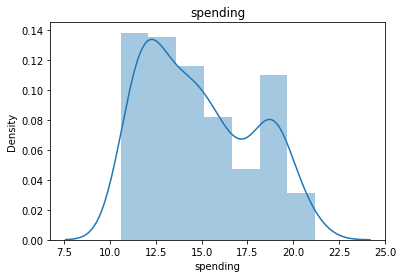

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


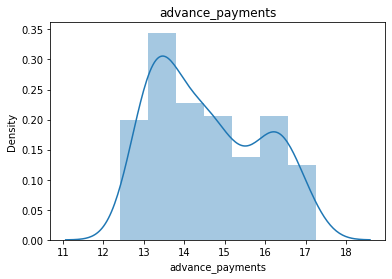

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


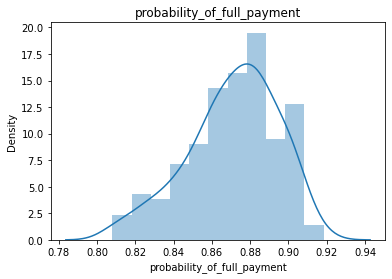

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


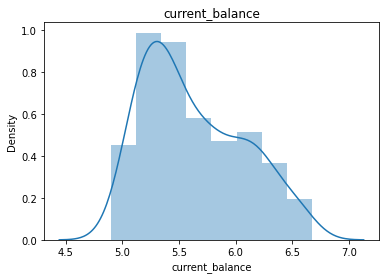

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


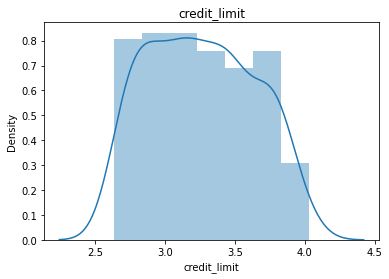

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


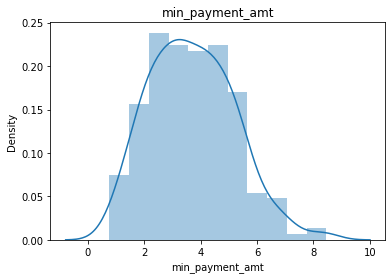

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


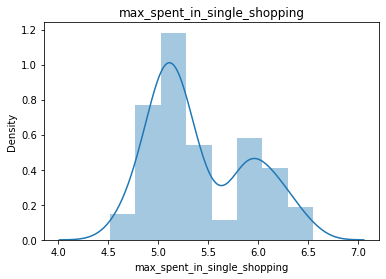

In [33]:
for i in df.columns:
  plt.title(f'{i}')
  sns.distplot(df[f'{i}'])
  plt.show()

In [34]:
df.skew(axis = 0, skipna = True)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

Multivariate Analysis:

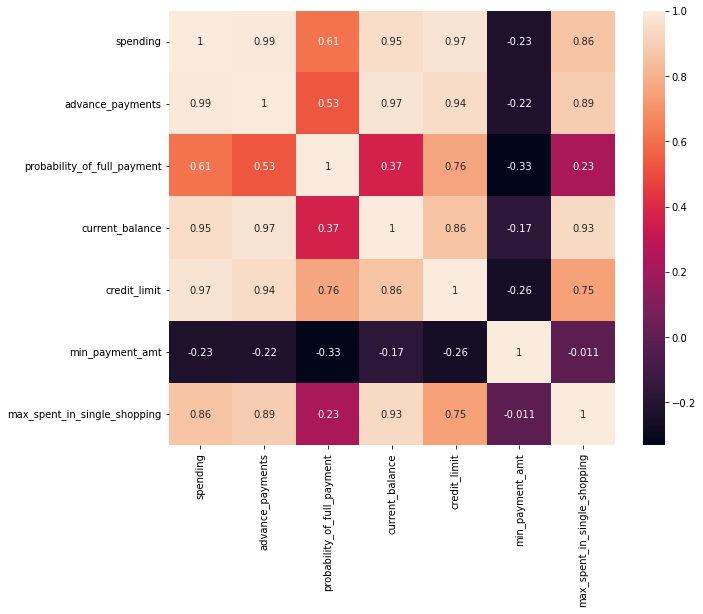

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we have very few outliers in the data, will choose to remove those data points

In [36]:
#creating a new column for z score of min_payment_amt
df['Zscore'] = scipy.stats.zscore(df.min_payment_amt)

### **Removing outliers**

In [37]:
display(df[~((df['Zscore'] < 3) & (df['Zscore'] > -3))])

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Zscore
5,12.7,13.41,0.8874,5.183,3.091,8.456,5.000,3.170590
89,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3.076588


In [38]:
display(df[(df['Zscore'] < 3) & (df['Zscore'] > -3)])

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Zscore
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,-0.298806
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,-0.242805
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,-0.221471
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0.987884
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,-1.088154
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0.190536
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,0.813214
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,-1.322158
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,-0.953484


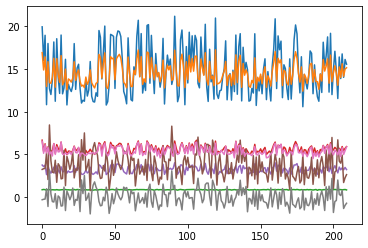

In [39]:
plt.plot(df)
plt.show()

In [40]:
df_std = StandardScaler().fit_transform(df)

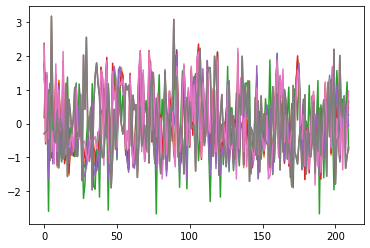

In [41]:
plt.plot(df_std)
plt.show()

**Hierarchical Clustering**

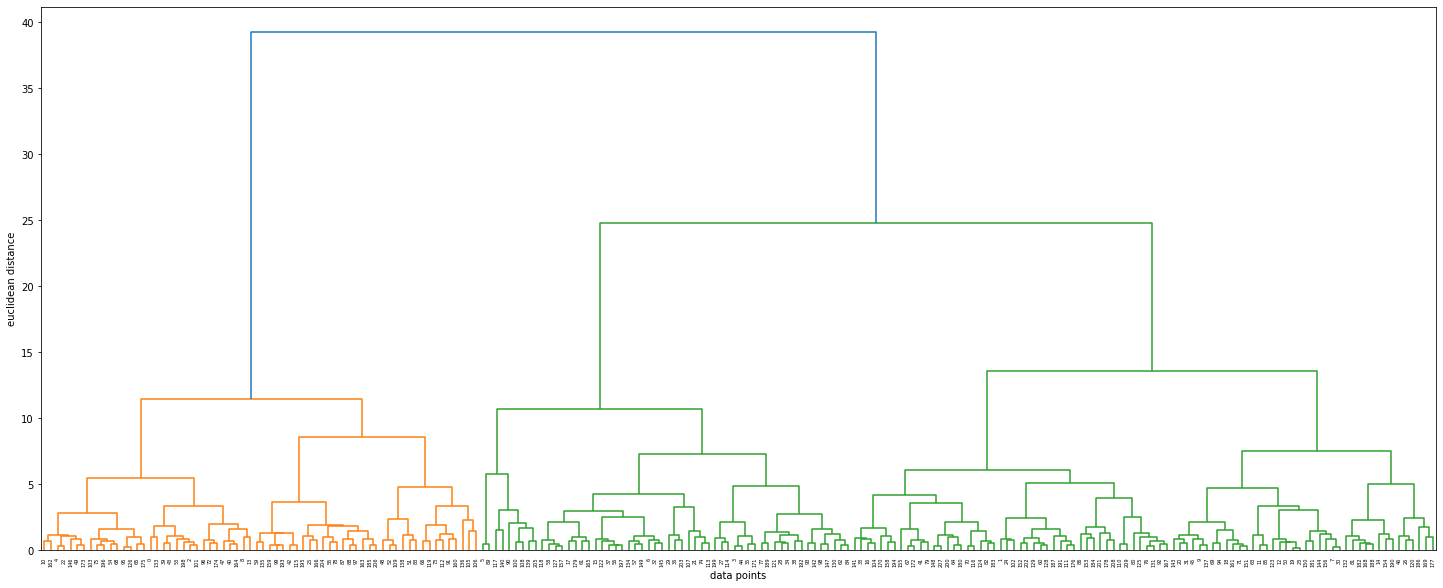

In [42]:
#create demogram and find the best clustering value
merg = linkage(df_std,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()


In [43]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(df_std)

In [44]:
data_predict

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0])

In [45]:
score = silhouette_score(df_std, data_predict, metric='euclidean')

In [46]:
score

0.36023730090568473

Count in different clusters

In [47]:
data_predict= list(data_predict)

In [48]:
print(Counter(data_predict))

Counter({0: 88, 1: 66, 2: 56})


In [49]:
df2=df.copy()

In [50]:
df['clusters'] = data_predict

In [51]:
clus0=df[df['clusters']==0]
clus1=df[df['clusters']==1]
clus2=df[df['clusters']==2]

print('Average min payment for cluster 0:',clus0['min_payment_amt'].mean())
print('Average min payment for cluster 1:',clus1['min_payment_amt'].mean())
print('Average min payment for cluster 2:',clus2['min_payment_amt'].mean())

Average min payment for cluster 0: 2.670297727272727
Average min payment for cluster 1: 3.7073939393939392
Average min payment for cluster 2: 5.310142857142857


In [52]:
print('Average spendings for cluster 0:',clus0['spending'].mean())
print('Average spendings for cluster 1:',clus1['spending'].mean())
print('Average spendings for cluster 2:',clus2['spending'].mean())

Average spendings for cluster 0: 13.910340909090907
Average spendings for cluster 1: 18.473333333333333
Average spendings for cluster 2: 12.046964285714285


In [53]:
avg_data=df.groupby('clusters').mean()
avg_data['Frequency']=df['clusters'].value_counts()
avg_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Zscore,Frequency
clusters,,,,,,,,,
0,13.910341,14.111364,0.875039,5.454000,3.176386,2.670298,5.117193,-0.686615,88
1,18.473333,16.196970,0.883680,6.178742,3.692197,3.707394,6.045606,0.004795,66
2,12.046964,13.333036,0.849704,5.254339,2.876786,5.310143,5.113786,1.073314,56


Applying KMeans CLustering

In [54]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(df_std)
labels= km.labels_
km.cluster_centers_

array([[-0.99615711, -0.97013308, -0.93828559, -0.85824426, -1.05812784,
         0.8082468 , -0.57934363,  0.8082468 ],
       [ 1.22617224,  1.23252269,  0.55073767,  1.21852534,  1.1367338 ,
        -0.02678179,  1.26983156, -0.02678179],
       [-0.19826756, -0.2309231 ,  0.40881969, -0.33061294, -0.04725079,
        -0.79339398, -0.66407115, -0.79339398]])

In [55]:
km.inertia_

554.3841312544209

In [56]:
Sum_of_squared_distances = []
for k in range(1,8):
  km2 = KMeans(n_clusters=k, random_state = 0)
  km2.fit(df_std)
  Sum_of_squared_distances.append(km2.inertia_)

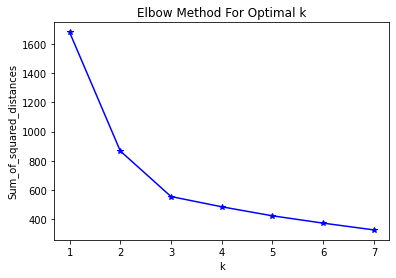

In [57]:
plt.plot(range(1,8), Sum_of_squared_distances, 'b*-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So based on Elbow plot, k should be 3

In [58]:
score = silhouette_score(df_std, labels, metric='euclidean')

In [59]:
score

0.40084528008318615

In [60]:
df2['clusters_km'] = labels

In [61]:
avg_data_km=df2.groupby('clusters_km').mean()
avg_data_km['Frequency_km']=df2['clusters_km'].value_counts()
avg_data_km

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Zscore,Frequency_km
clusters_km,,,,,,,,,
0,11.955915,13.295352,0.848880,5.249183,2.859887,4.912549,5.124014,0.808247,71
1,18.406812,16.165072,0.883981,6.167130,3.686942,3.660029,6.030681,-0.026782,69
2,14.272000,14.258429,0.880636,5.482400,3.240800,2.510131,5.082471,-0.793394,70


From both the methods the number of cluster value coming out to be 3. Also the silhoutte score are nearly same, so based on 3 cluster we can infer it as high, medium and low spending people with probability of full payment and maximum spent proportional to spending. Various marketting strategies can be applied for each clusters like- credit limit increment/decrement, discount offers on transactions, rewards, changing interest rates. The medium spending people are the potential customers on which various marketing strategies can be applied efficiently. The low spending people shoud be driven towards more spending giving them different offers like early payment discounts to uplift their payment rates. 